# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 or later syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npy files, and will contain data in a single numpy array corresponding to the unlabelled data X of shape num_samples by num_dimensions

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # This will be commented out during evaluation. Write your own k-means code.
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from matplotlib.patches import Ellipse

def practical_eigen_symmetric(L):
    # Returns the eigen values and eigen vectors of a symmetric matrix L. eigen values are sorted in ascending order, and eig_vecs[:,i] corresponds to the ith eigen vector
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

# Q1 Spectral Clustering.

Write code for doing spectral clustering below.

i.e. Convert the unlabelled data (Data A) into an adjacency matrix using D_{i,j} = exp(-\gamma * ||x_i - x_j||). Convert the adjacency matrix into a Laplacian and find the lowest n eigen-vectors and use that to create feature matrix of shape num_samples-by-n. Use k-means clustering to cluster the resulting data.  

Now plot the following scatterplots of the data with clusterlabels as colors.


1. The results of k-means clustering on the raw data with k=3.
2. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,3 and 3.
3. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,10 and 3.
4. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 3 and 3.
5. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 10 and 3.


Comment on the nature of the results in the text cell below.

You are only allowed to use the pratical eigen vector finder given as defined above here. This is meant to simulate real eigen solvers which are iterative and approximate in nature. You can use the import of KMeans from sklearn to begin with, but the final submission should be based on your own implementation of kMeans or there will be a penalty.




In [ ]:
# Codewrite cell (Use as you wish)

def spectral_clustering(Gamma,X_train,size,n):
   distance_matrix = np.zeros((size, size))
   for i in range(size):
        distance_matrix[:, i] = np.sqrt(np.sum((X_train - X_train[i])**2, axis=1))
   adjacency_matrix = np.exp(-Gamma * distance_matrix)
   degree = np.diag(np.sum(adjacency_matrix,axis=0))
   Lap_mat=degree-adjacency_matrix
   eigen_value,eigen_vector=practical_eigen_symmetric(Lap_mat)
   feature_matrix = eigen_vector[:, :n]
   return feature_matrix

class KMeans:
    def __init__(self, n_clusters, max_iters=300):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self.assign_labels(X)
            # Update centroids
            new_centroids = self.update_centroids(X, labels)
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

    def assign_labels(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        # Assign labels based on the nearest centroid
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

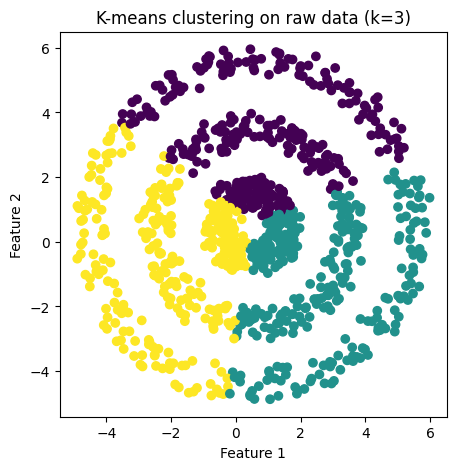

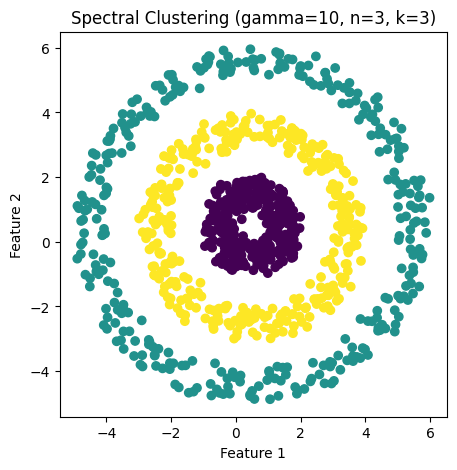

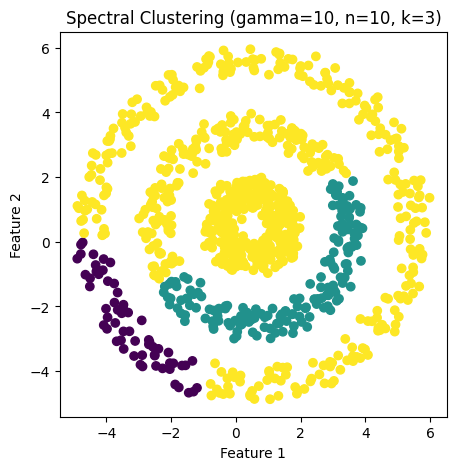

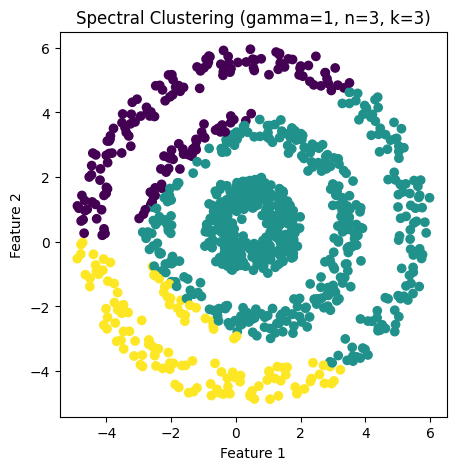

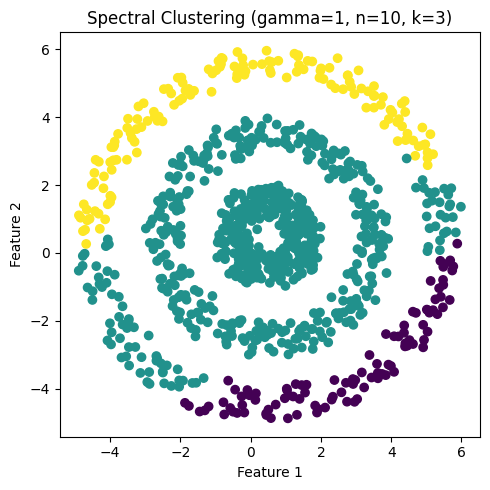

In [ ]:
# Codewrite cell (Get the 5 scatter plots here)
X_train =np.load("../../Data/Dataset_A.npy")
size=X_train.shape[0]
kmeans = KMeans(3)
# Fit the model to the data
kmeans.fit(X_train)
labels_raw = kmeans.assign_labels(X_train)
# Plot results of k-means clustering on the raw data
plt.figure(figsize=(5, 5))
plt.subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels_raw, cmap='viridis')
plt.title('K-means clustering on raw data (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');
plt.show()

params = [
    (10, 3, 3),
    (10, 10, 3),
    (1, 3, 3),
    (1, 10, 3)
]
# Perform spectral clustering followed by k-means and plot results
for i, (gamma, n, k) in enumerate(params):
    feature_matrix = spectral_clustering(gamma, X_train, size, n)
    kmeans = KMeans(k)
# Fit the model to the data
    kmeans.fit(feature_matrix)
# Get cluster assignments for each data point
    kmeans_raw_labels = kmeans.assign_labels(feature_matrix)
    plt.figure(figsize=(5, 5))
    plt.subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans_raw_labels, cmap='viridis')
    plt.title(f'Spectral Clustering (gamma={gamma}, n={n}, k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Textwrite cell
<font color='Red'> For K_Means on Raw Data: </font>
<br>
Depending on the distribution and variance of the raw data cluster are form arbitary type not properly distributed.
<br>

<font color='Red'> Spectral Clustering Followed by K-means:</font>
<br>
<font color='Red'> For (Gamma,n,k) =10,3,3:</font> It  form tighter clusters as a higher gamma value makes the adjacency matrix more sensitive to small differences in distance.Cluster are form in concentric circle for 3 component in each circled cluster .

<font color='Red'> For (Gamma,n,k) =10,10,3 :</font> Increasing the number of eigenvectors (n) can capture more variance in the data, so cluster are from in arbitary form for 2 component and third one is correct in same orbit.

<font color='Red'> For (Gamma,n,k) =1,3,3: </font> in lower gamma value will make the adjacency matrix less sensitive to distance,  it result in more overlapping clusters.

<font color='Red'> For (Gamma,n,k)= 1,10,3 :</font> With more eigenvectors, even with a low gamma, the clustering might still be effective due to capturing more dimensions of the data but it create one cluster as more data as compared to other.



# Q2: DB Scan

Cluster the dataset B using DBScan. You may use the inbuilt DBscan function in sklearn  Explore the eps and min_samples parameter.

Give a scatterplot of the datapoints that are not labelled as outlier by DBScan. Color the data points based on cluster label.

Use eps values (0.1, 0.3 and 1) and min_samples values (3,10,30) for a total of 9 plots. Summarise your conclusions in the textwrite cell.

In [ ]:
# Codewrite cell (Use as you wish)
def DBscan(train_X,ep,min_sample):
  clusters= DBSCAN(eps=ep, min_samples=min_sample).fit(train_X)
  labels=clusters.labels_
  plt.figure(figsize=(5,5))
  plt.subplot(1,1,1)
  inliers_indices = labels != -1
  # Select inliers data points
  inliers = train_X[inliers_indices]
  plt.scatter(inliers[:, 0], inliers[:, 1], c=labels[inliers_indices], cmap="viridis")
  plt.title(f'DBScan Clusters with (Epsilon={ep},min_samples={min_sample})')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()

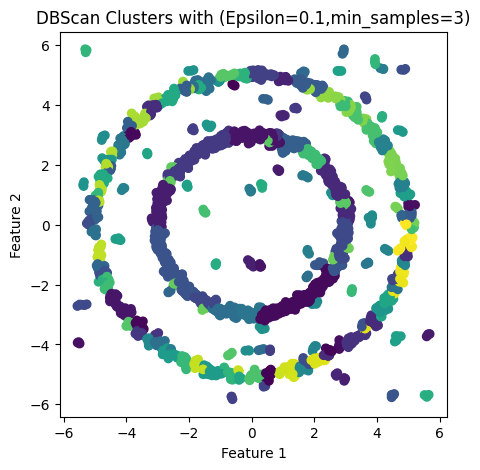

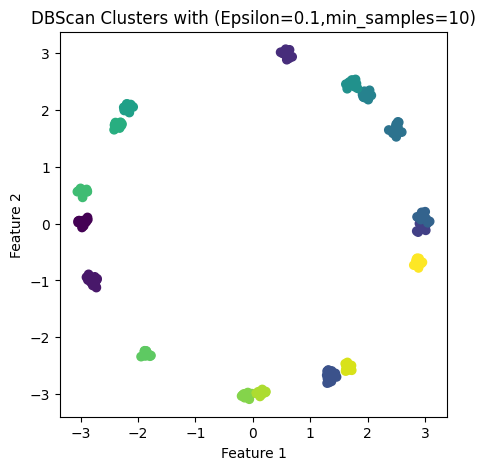

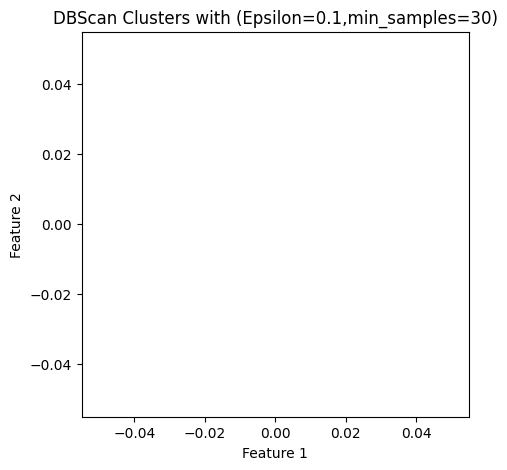

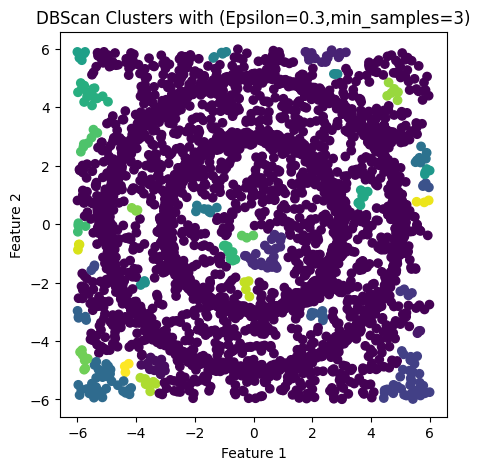

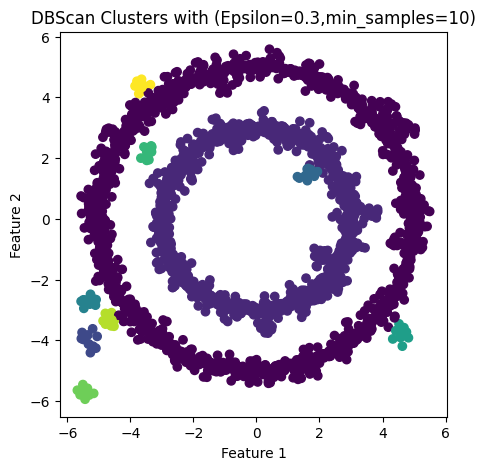

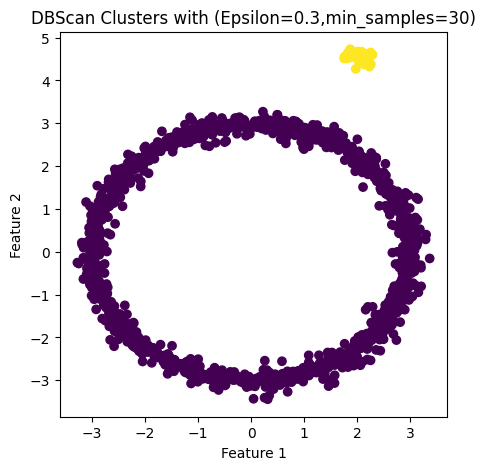

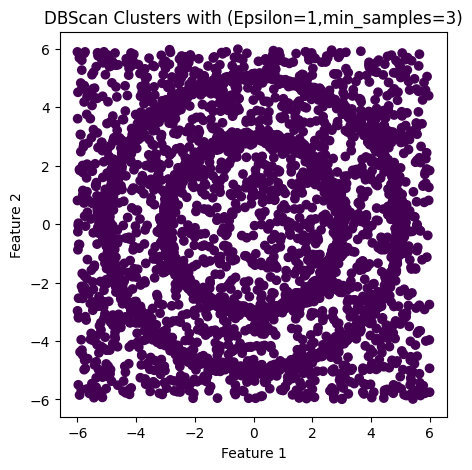

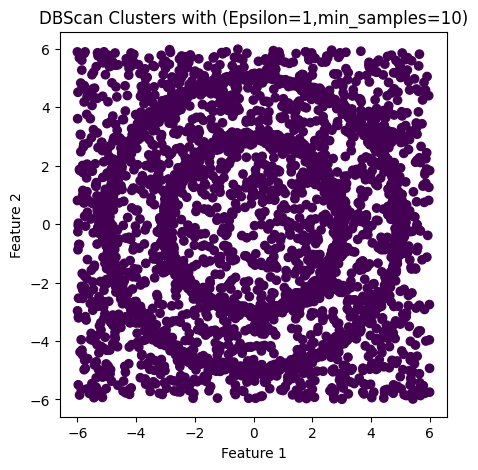

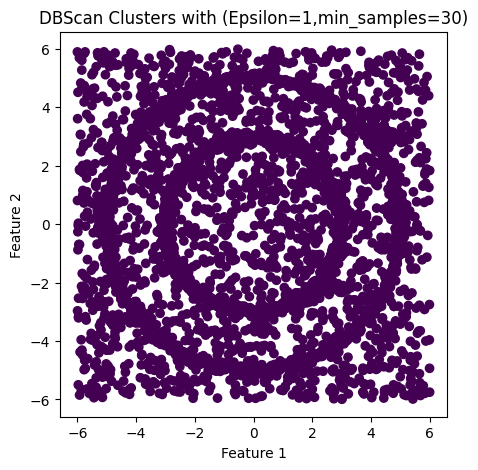

<Figure size 640x480 with 0 Axes>

In [ ]:
# Codewrite cell. Get the 9 plots here.
eps=[0.1 , 0.3 , 1]
min_samples=[3 , 10 , 30]
train_B=np.load("../../Data/Dataset_B.npy")

for i,ep in enumerate(eps):
  for j,samples in enumerate(min_samples):
    DBscan(train_B, ep, samples)
plt.tight_layout()

# Textwrite cell
As seen from above for Eps=0.1 & Min_Samples=3 there are more unique label as compared to Min_Samples=10,30.
<br>
<font color='Red'>
No scatter ploting for Eps=0.1 and Min_samples=30 as there are no unique label satisfy condition so all are Outliers and as mentioned not to plot outlier hence empty graph is there.
</font>
<br>
For Eps=0.3 and Min_Samples=3,10 the labels are more as compared to Min_Samples=30.
<br>
For Eps=1 and Min_Samples =3,10,30 as seen plooting are same because are there one cluster form for different data after satisfy condition.

# Q3: PCA and k-Nearest Neighbours

Consider the Digits dataset that is a part of the sklearn library. It consists of 1797 64 dimensional vectors with each corresponding to an 8x8 image of a digit. The label also gives the digit id. It is a 10-class classification problem.

Choose a random subset of size 1500 for train and the rest for testing. Run k-Nearest neighbours with k values 1,3,7,15 and 31 and report the training and test accuracy.

Repeat the above after performing PCA on the data. Use top n-principal components for n=2,4,8,16,32. For each n in the list report the best k-NN test accuracy and the k which achieves that accuracy and the approximation error for this particular value of n.

Repeat the above for a noisy version of the data. i.e. add a random Gaussian noise of mean zero and variance 1 to all the 1797*64 input numbers.

In total, the results should be given in 4 tables in the last textwrite cell:. Summarise your findings in a paragraph.

Table 1: Raw data , k-NN performance. One row for each k.

Table 2: n-component PCA preprocessed data k-NN performance. One row for each n.

Table 3: Raw noised data, k-NN performance. One row for each k.

Table 4: n-component PCA preprocessed noised data k-NN performance. One row for each n.

In [ ]:
# Codewrite cell (Use as you wish)
def KNNClassifier(k,train_X,test_X,train_Y):
  Pred_Y=[]
  for X in test_X:
    dist = np.sqrt(np.sum((train_X - X) ** 2, axis=1))
    index=np.argsort(dist)[:k]
    k_nearest_labels = train_Y[index]
    common = np.argmax(np.bincount(k_nearest_labels))
    Pred_Y.append(common)
  return np.array(Pred_Y)

def accuracy(Y_actual,Pred_Y):
  accuracy=np.sum(Y_actual == Pred_Y) / len(Y_actual)
  return accuracy

def PCA(train_X,no_component):

  X_bar=np.mean(train_X,axis=0)[None,:]

  covariance=np.dot(train_X.T - X_bar.T , train_X - X_bar)/len(train_X)
  eig_vals, eig_vecs = np.linalg.eigh(covariance)
  sorted_idx = np.argsort(eig_vals)[::-1]
  # Sort eigenvalues and eigenvectors accordingly
  eig_vals = eig_vals[sorted_idx]
  eig_vecs = eig_vecs[:, sorted_idx]
  Z = np.zeros((len(train_X),no_component))
  b = np.zeros(train_X.shape[1])
  U = np.array(eig_vecs)
  for  n in range(len(train_X)):
    for m in range(no_component):
      Z[n,m]= np.dot(train_X[n],U[:,m])

  for i in range(no_component,train_X.shape[1]):
    b[i]=np.matmul(X_bar,U[:,i]).item()
  X_compressed=np.zeros(train_X.shape)
  for  n in range(len(train_X)):
    for m in range(no_component):
      X_compressed[n,:] += Z[n,m]*U[:,m].T
    for i in range(no_component,train_X.shape[1]):
      X_compressed[n,:] += b[i]*U[:,i].T
  return X_compressed
def approximation_error(original_X, reconstructed_X):
    return np.mean(np.square(reconstructed_X - original_X))

In [ ]:
# Codewrite cell (Do the experiments for filling Tables 1 and 2 here)
Digits=load_digits()
X,Y=Digits.data , Digits.target
n_=[2,4,8,16,32]
k_=[1,3,7,15,31]
train_size=1500
np.random.seed(42)
indices=np.random.permutation(len(X))
train_indices=indices[:train_size]
test_indices=indices[train_size:]
train_X, train_Y = X[train_indices], Y[train_indices]
test_X, test_Y = X[test_indices], Y[test_indices]


test_accuracy_raw={}

for i,val in enumerate(k_):
  Y_predict_test = KNNClassifier(val,train_X,test_X,train_Y)
  Y_predict_train= KNNClassifier(val,train_X,train_X,train_Y)
  test_accuracy = accuracy(test_Y,Y_predict_test)
  train_accuracy= accuracy(train_Y,Y_predict_train)
  test_accuracy_raw[i]=(train_accuracy,test_accuracy)
# print(test_accuracy_raw)

best_test_approximation = {}
best_test_k = {}
test_train_accuracy = {}
for i,n in enumerate(n_):
  new_X = PCA(X, n)
  train_X, train_Y = new_X[train_indices], Y[train_indices]
  test_X, test_Y = new_X[test_indices], Y[test_indices]

  best_test_accuracy = -1
  best_k_val = -1
  accuracy_raw = {}
  best_test_approximation[i]=approximation_error(X,new_X)

  for k in k_:
      Y_predict_test = KNNClassifier(k, train_X, test_X, train_Y)
      Y_predict_train = KNNClassifier(k, train_X, train_X, train_Y)
      test_accuracy = accuracy(test_Y, Y_predict_test)
      train_accuracy = accuracy(train_Y, Y_predict_train)
      accuracy_raw[k] = (train_accuracy, test_accuracy)

      if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_k_val = k
  best_test_k[n] = (best_test_accuracy, best_k_val)
  test_train_accuracy[n] = accuracy_raw

# print(best_test_approximation)
# print("Best k and test accuracy for each n:")
# for n, (best_acc, best_k_val) in best_test_k.items():
#     print(f"n={n}: Best k={best_k_val}, Best Test Accuracy={best_acc}")

# # print("\nTrain/Test accuracies for each k and n:")
# # for n, acc_dict in test_train_accuracy.items():
# #     print(f"\nn={n}:")
# #     for k, (train_acc, test_acc) in acc_dict.items():
# #         print(f"k={k}: Train Accuracy={train_acc}, Test Accuracy={test_acc}")


In [ ]:
# Codewrite cell (Do the experiments for filling Tables 3 and 4 here)
Digits=load_digits()
X,Y=Digits.data , Digits.target
noisy_X = X + np.random.normal(0, 1, X.shape)
n_=[2,4,8,16,32]
k_=[1,3,7,15,31]
train_size=1500
np.random.seed(42)
indices=np.random.permutation(len(noisy_X))
train_indices=indices[:train_size]
test_indices=indices[train_size:]
train_X, train_Y = noisy_X[train_indices], Y[train_indices]
test_X, test_Y = noisy_X[test_indices], Y[test_indices]


test_accuracy_raw={}

for i,val in enumerate(k_):
  Y_predict_test = KNNClassifier(val,train_X,test_X,train_Y)
  Y_predict_train= KNNClassifier(val,train_X,train_X,train_Y)
  test_accuracy = accuracy(test_Y,Y_predict_test)
  train_accuracy= accuracy(train_Y,Y_predict_train)
  test_accuracy_raw[i]=(train_accuracy,test_accuracy)
# print(test_accuracy_raw)

best_test_approximation = {}
best_test_k = {}
test_train_accuracy = {}
for i,n in enumerate(n_):
  new_X = PCA(noisy_X, n)
  train_X, train_Y = new_X[train_indices], Y[train_indices]
  test_X, test_Y = new_X[test_indices], Y[test_indices]

  best_test_accuracy = -1
  best_k_val = -1
  accuracy_raw = {}
  best_test_approximation[i]=approximation_error(noisy_X,new_X)

  for k in k_:
      Y_predict_test = KNNClassifier(k, train_X, test_X, train_Y)
      Y_predict_train = KNNClassifier(k, train_X, train_X, train_Y)
      test_accuracy = accuracy(test_Y, Y_predict_test)
      train_accuracy = accuracy(train_Y, Y_predict_train)
      accuracy_raw[k] = (train_accuracy, test_accuracy)

      if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_k_val = k
  best_test_k[n] = (best_test_accuracy, best_k_val)
  test_train_accuracy[n] = accuracy_raw
# print(best_test_approximation)
# print("Best k and test accuracy for each n:")
# for n, (best_acc, best_k_val) in best_test_k.items():
#     print(f"n={n}: Best k={best_k_val}, Best Test Accuracy={best_acc}")

# # print("\nTrain/Test accuracies for each k and n:")
# # for n, acc_dict in test_train_accuracy.items():
# #     print(f"\nn={n}:")
# #     for k, (train_acc, test_acc) in acc_dict.items():
# #         print(f"k={k}: Train Accuracy={train_acc}, Test Accuracy={test_acc}")


# Textwrite cell
### <font color='Red'> Table-1 (KNN) </font>
|K|Training Accuracy | Test Accuracy |
|-----|----------|----------|
1    | 1.0  | 0.9831  |
3    | 0.9933  | 0.9865   |
7    | 0.9886   | 0.9797   |
15    | 0.9833   | 0.9730   |
31    | 0.97   | 0.9595   |


<br>

### <font color='Red'> Table-2 (KNN with PCA) </font>
|n|Test Accuracy|K      | Approximation |
|-----|----------|---------|----------|
2    | 0.6430  | 7  |  13.421|
4    | 0.8720  | 7   | 9.6279 |
8    | 0.9663   | 7   | 6.1217|
16    | 0.9865  | 3  | 2.8271|
32    | 0.9865   | 3   |0.6316 |

<br>



### <font color='Red'> Table-3 (KNN On Noised Data) </font>  
|K|Training Accuracy | Test Accuracy |
|-----|----------|----------|
1    | 1.0  | 0.9865  |
3    | 0.9926  | 0.9898   |
7    | 0.9886   | 0.9831   |
15    | 0.9806   | 0.9730   |
31    | 0.9713  | 0.9528   |



<br>

### <font color='Red'> Table-4 (KNN with PCA on Noised Data) </font>
|n|Test Accuracy|K      | Approximation |
|-----|----------|---------|----------|
2    | 0.6060  | 15  |  14.4020|
4    | 0.8619  | 3   |  10.5854|
8    | 0.9595   | 1   | 7.0152 |
16    | 0.9865   | 3   | 3.5692|
32    | 0.9898   | 3   | 1.1139|



<br>

The KNN classifier performed well on the original dataset, achieving the highest test accuracy of 0.9865 with 𝑘=3.<br>
Applying PCA improved performance with reduced dimensionality, especially with 16 and 32 components, maintaining high accuracy and better approximation. <br>
Adding Gaussian noise in data will slightly decreased accuracy, but KNN remained robust, achieving 0.9898 test accuracy with 𝑘=3. <br>
PCA was also effective on noised data, with the best result at 32 components. Overall, KNN with PCA balances accuracy and dimensionality reduction, performing reliably even with noise.

# Q4 : Expectation Maximisation for GMM.

Use Dataset C for learning the parameters of a GMM using Expectation maximization. Set the number of compoents as 3.

Plot the contours of the estimated components at init, and after 1 EM iteration, 2 EM iterations, 4 EM iterations and 8 EM iterations. (A single elliptical contour for each component is sufficient.) Add the scatterplot of the data points too here.

Also, estimate plot the log likelihood of the data and the lower bound L(q,\theta) thatis optimised as a function of the EM iteration number.

Expected output: 4 plots giving the component means and variances along with the scatterplot. One plot giving iterations vs L(q;theta) and ln P(X|theta).

You may use the code below for plotting the elliptical contours of the estimated components. It requires you to pass the axes of the plot figure as an argument.

In [ ]:
# Code read
def plot_ellipses_gmm(means, covariances,ax):
    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):

        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none')
        ax.add_artist(ell)


In [ ]:
# Codewrite cell (Use as you wish)

def plot_scatter(X, ax):
    color_list=['r','g','b','k']
    ax.axis('equal')
    for i,data in enumerate(X):
        ax.scatter(data[:,0],data[:,1], c=color_list[i], marker='o')

def init(train_X,no_component):
  means= train_X[np.random.choice(train_X.shape[0],no_component,False)]
  covariance = np.array([np.eye(train_X.shape[1])]*no_component)
  weight=np.ones(no_component) / no_component
  return means,covariance,weight

def EM_GMM(iter, no_component,train_X,means,covariance,weight):
  log_likelihoods=[]
  for i in range(iter):
    # Estep
    responsibility = np.zeros((len(train_X),no_component))
    for i in range(len(train_X)):
      for j in range(no_component):
          diff = train_X[i] - means[j]
          inv_cov = np.linalg.inv(covariance[j])
          exponent = -0.5 * np.dot(np.dot(diff, inv_cov), diff.T)
          numerator = weight[j] * np.exp(exponent)
          denominator = np.sqrt((2 * np.pi)**len(train_X[0]) * np.linalg.det(covariance[j]))
          responsibility[i,j]=numerator/denominator
    responsibility /= responsibility.sum(axis=1)[:,None]
    # M step
    for i in range(no_component):
      for j in range(len(train_X)):
        means[i] += responsibility[j,i] * train_X[j,:]
      means[i] /= responsibility.sum(axis=0)[i]

    # weight array updatation
    weight = responsibility.sum(axis=0) / len(train_X)
    #  covariance updation
    for i in range(no_component):
      for j in range(len(train_X)):
        covariance[i] += responsibility[j,i] *  np.outer(train_X[j,:]-means[i],train_X[j,:]-means[i])
      covariance[i] /= responsibility.sum(axis=0)[i]

     # Compute log likelihood
      log_likelihood = 0
      for i in range(len(train_X)):
          log_likelihood += np.log(np.sum([
              weight[j] * (np.exp(-0.5 * np.dot(np.dot(train_X[i] - means[j], np.linalg.inv(covariance[j])),train_X[i] - means[j].T)) /
                  np.sqrt((2 * np.pi) ** len(train_X[0]) * np.linalg.det(covariance[j])))
              for j in range(no_component)
          ]))
      log_likelihoods.append(log_likelihood)
  return means,covariance,weight,log_likelihoods


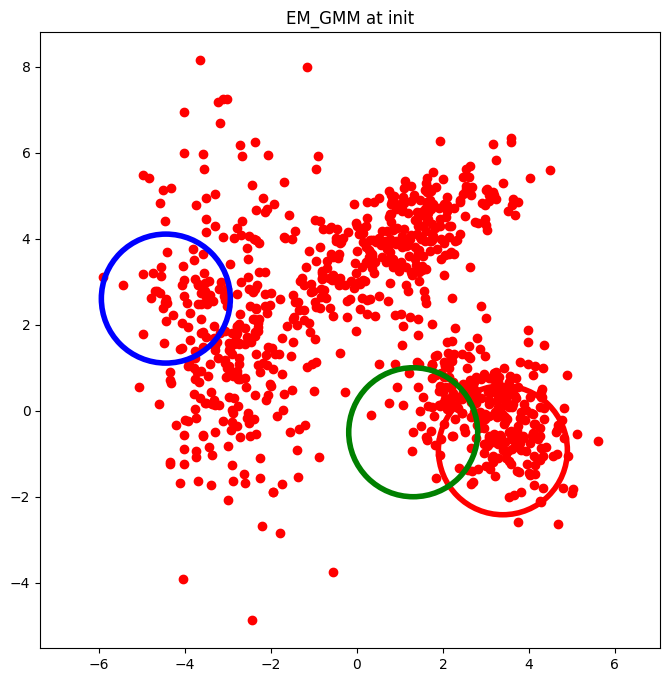

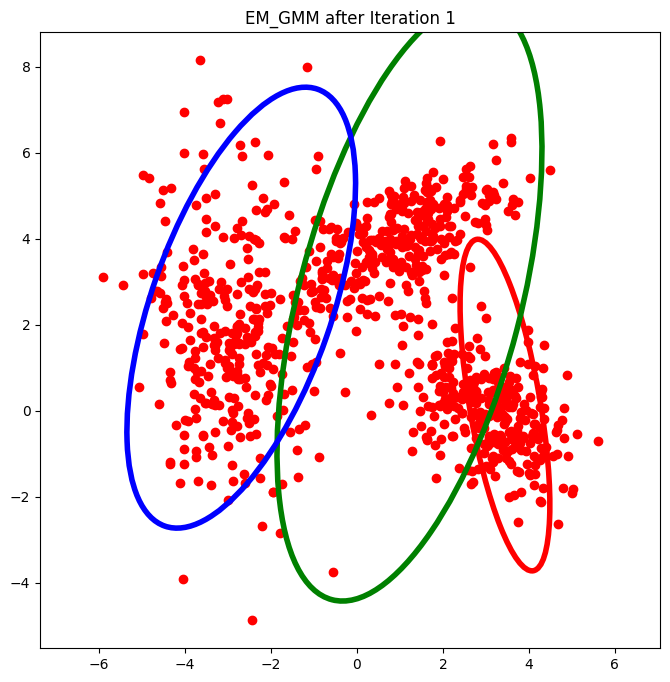

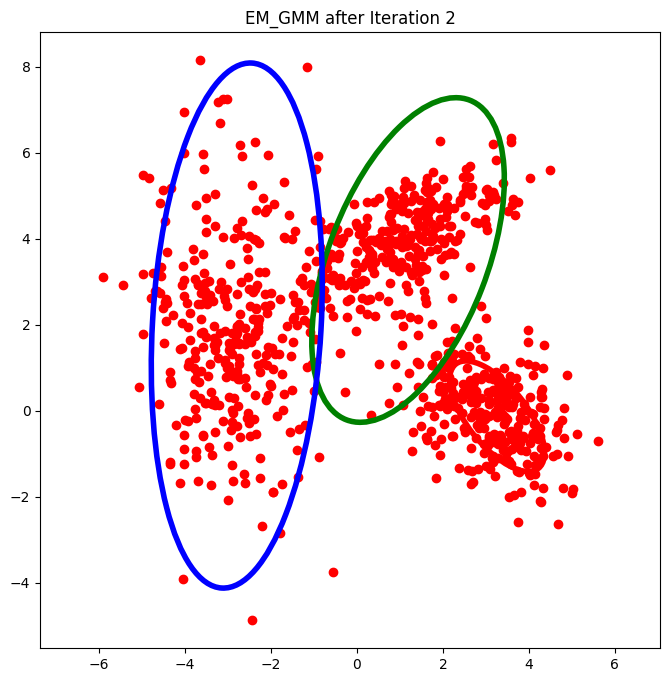

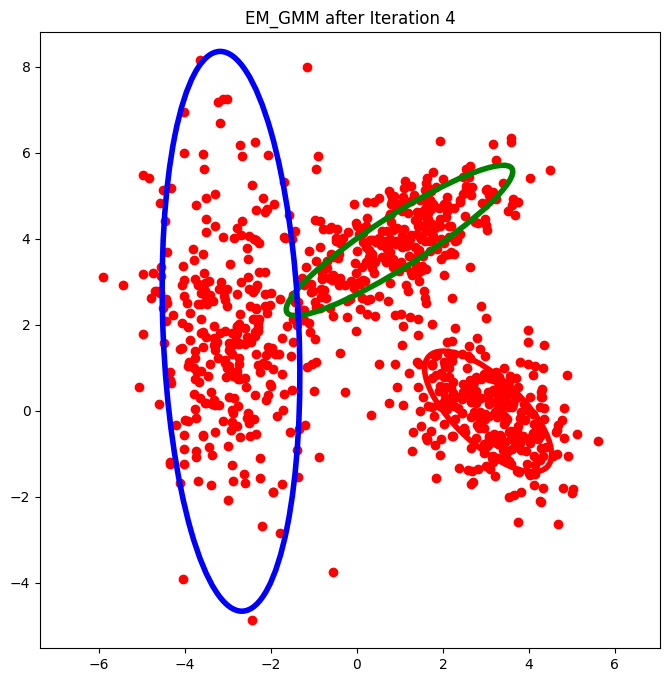

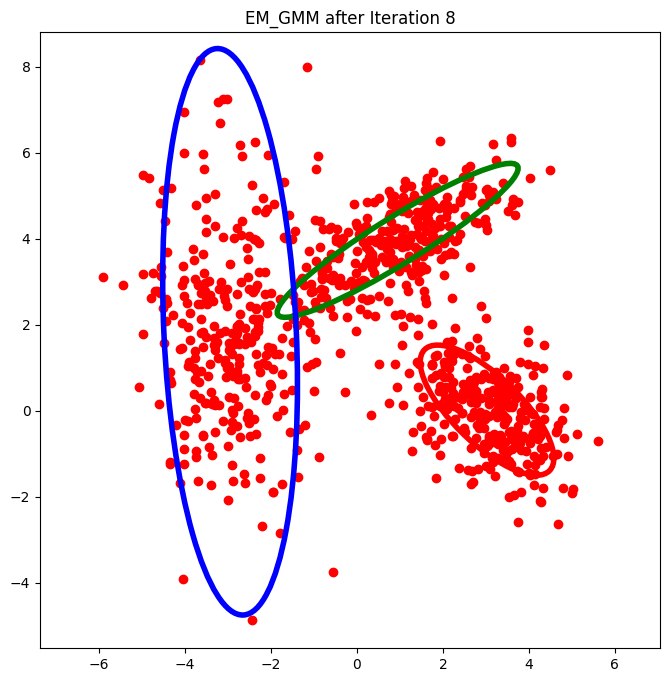

In [ ]:
# Code write: Get the four plots with component contours here
iter=[1,2,4,8]
train_X=np.load("../../Data/Dataset_C.npy")
means,covariance,weight=init(train_X,3)
fig=plt.figure(figsize=(8,8))
ax=plt.gca()
ax.axis('equal')
plot_scatter([train_X], ax)
plot_ellipses_gmm(means, covariance, ax)
ax.set_title(f'EM_GMM at init')
plt.show()

for i,it in enumerate(iter):
  mean,cov,wgt,log_likelihoods=EM_GMM(it,3,train_X,means,covariance,weight)
  fig=plt.figure(figsize=(8,8))
  ax=plt.gca()
  ax.axis('equal')
  plot_scatter([train_X], ax)
  plot_ellipses_gmm(mean, cov, ax)
  ax.set_title(f'EM_GMM after Iteration {it}')
  plt.show()


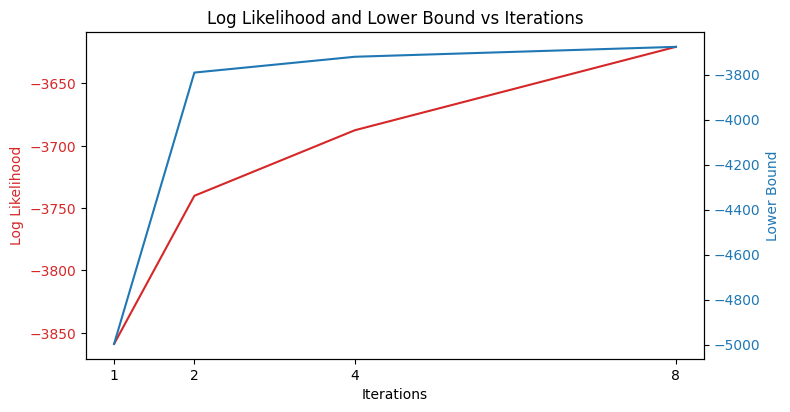

In [ ]:
#Code write: Get the plot of iterations vs L(q;theta) and ln P(X|theta) here.
log_likelihoods_list = []
lower_bounds_list = []
no_components=3
iter=[1,2,4,8]
means, covariance, weight = init(train_X, no_components)
for it in iter:
    mean, cov, wgt, log_likelihoods = EM_GMM(it, no_components, train_X, means, covariance, weight)
    log_likelihoods_list.append(log_likelihoods[-1])  # Append the last log likelihood
    lower_bounds_list.append(log_likelihoods[0])  # Lower bound is the first value in log likelihoods

fig, ax1 = plt.subplots(figsize=(8, 4))
color = 'tab:red'
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Log Likelihood', color=color)
ax1.plot(iter, log_likelihoods_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Lower Bound', color=color)
ax2.plot(iter, lower_bounds_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-ticks and labels
plt.xticks(iter)
fig.tight_layout()
plt.title('Log Likelihood and Lower Bound vs Iterations')
plt.show()